# Como usar Machine Learning para dar o melhor atendimento para os seus clientes?

## Parte 1: Introdução ao problema de negócio

Uma rede de roupas verejista, com diversas lojas espalhadas pelo país, deseja melhor o <u>nível de satisfação</u> dos seus clientes.

Ao fazer uma pesquisa de satisfação com alguns clientes, encontraram os seguintes comentários:
> "O vendedor fica me mostrando um monte de roupas que, na hora de pagar, descubro que **não posso pagar o preço exorbitante de diversas peças**. <u>Me senti extremamente humilhado</u>"

> "A experiência foi <u>ridícula</u>! Fui pra comprar roupas finas, para a festa de aniversário da minha sobrinha, e só me foram mostrados **produtos de qualidade inferior**. O vendedor <u>me julgou pela forma como eu estava vestido</u> ou o que?"

> Deviam <u>fechar a loja da cidade</u>! **Preço abusivo, descorrelacionado com o custo de vida daqui**.

Por possuir roupas de diversas qualidades e clientes com preferências muito diversas, esse projeto se tornou um desafio.

Atualmente a loja possui uma política padrão, de sempre enviar <u>todas as qualidades de produtos para todas as lojas</u>, e fornecer um <u>treinamento padrão para todos os colaboradores</u>.

### Como fornecer uma forma de tirar <u>insights dos dados</u> para criar <u>políticas individualizadas</u> para cada uma das lojas/clientes?

<hr/>

## Parte 2: Dando uma olhada nos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('segmentation data.csv').set_index('ID')
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


<img src="depara2.JPG" />

### Proposta inicial: Vamos direcionar produtos de acordo com a renda da maior parte dos clientes que frequentam cada uma das lojas. 

> Podemos até criar nomes diferentes para que o cliente possa facilmente distinguir o preço esperado em cada uma das lojas!

**Problema:** Por questões da Lei Geral de Proteção ao Dados <u>não podemos mais coletar dados de renda dos clientes</u> para esta finalidade.

Todas as outras variáveis ainda estão disponíveis

### Será que podemos <i>relacionar</i> a renda com as outras variáveis, mais facilmente acessíveis?
<hr />

## Parte 3: Visualização

In [3]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


<AxesSubplot:>

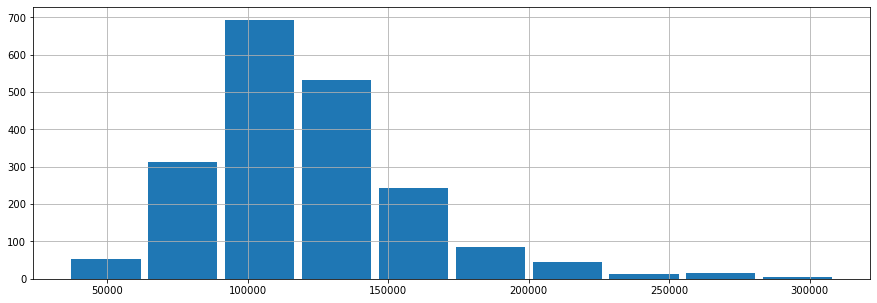

In [4]:
plt.figure(figsize=(15,5))
df['Income'].hist(bins=10, rwidth=0.90)

## Parte 4: Criando as variáveis de modelagem

In [5]:
X = df.drop('Income', axis=1)
y = df['Income']

#### Separação em treino e teste

In [6]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.20, random_state=61658)

In [7]:
y_ts

ID
100001631     71076
100001380    104833
100001130    159716
100001474     92342
100000409    171860
              ...  
100001768     83481
100001354    123194
100001633    125538
100001469    100560
100000702    157473
Name: Income, Length: 400, dtype: int64

In [8]:
X_ts

,Sex,Marital status,Age,Education,Occupation,Settlement size
ID,,,,,,
100001631,0,0,23,0,0,0
100001380,1,0,48,2,0,0
100001130,0,0,52,1,1,2
100001474,1,0,45,2,0,0
100000409,0,1,26,1,2,0
...,...,...,...,...,...,...
100001768,1,0,41,1,0,0
100001354,1,1,52,2,1,0
100001633,1,1,26,1,1,0


## Parte 5: Criando seu modelo (do jeito errado)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# NUNCA, NUNCA, NUNCA, NUNCA façam isso!
dt = DecisionTreeRegressor()
dt.fit(X_tr,y_tr)

In [ ]:
# from sklearn.tree import plot_tree

# plt.figure(figsize=(15,7))
# plot_tree(dt); #Isso não vai rodar!

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,7))
plot_tree(dt, max_depth=6); 

## Precisamos reduzir isso! Isso é a mesma coisa que falar individualmente com cada cliente!

<hr />

## Parte 6: Fazendo seu primeiro modelo (do jeito certo)
### Otimizando parâmetros

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': [3,4,5,6,7,8],
    'min_samples_leaf': [5,10,20],
}

model = GridSearchCV(
    DecisionTreeRegressor(random_state=61658),
    params,
    cv=10,
    scoring='neg_mean_squared_error',
    verbose=10,
    n_jobs=1,
)

model.fit(X_tr,y_tr)

In [ ]:
model.best_params_

In [ ]:
(model.best_score_*(-1))**0.50

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_ts, model.predict(X_ts))**0.50

## Parte 7: Avaliando os resultados

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(y_ts - model.predict(X_ts), bins=15, rwidth=0.90)

## Parte 8: Interpretando os resultados

In [ ]:
X_tr

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,7))
plot_tree(
    model.best_estimator_,
    feature_names = X_tr.columns,
    filled=True,
    node_ids=True,
    rounded=True,
    impurity=False,
    precision=2
); 

## Parte 9: Uma outra abordagem: Modelo de classificação

In [ ]:
X = df.drop('Income',axis=1)
y = df['Income'] >= 125_000

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,test_size=.2, random_state=61658)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'max_leaf_nodes': [3,4,5,6,7,8],
    'min_samples_leaf': [5,10,20],
}

model = GridSearchCV(
    DecisionTreeClassifier(random_state=61658),
    params,
    cv=10,
    scoring='roc_auc',
    verbose=10,
    n_jobs=5,
)

model.fit(X_tr, y_tr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_ts, model.predict_proba(X_ts)[:,1])

In [ ]:
plt.figure(figsize=(15,5))
nbins = 11
plt.hist(model.predict_proba(X_ts.loc[y_ts==1])[:,1], bins=np.linspace(0,y_ts.max(), nbins), density=True, rwidth=.8, color='C0', alpha=.3, label='Baixa renda')
plt.hist(model.predict_proba(X_ts.loc[y_ts==0])[:,1], bins=np.linspace(0,y_ts.max(), nbins), density=True, rwidth=.8, color='C3', alpha=.3, label='Alta renda')

plt.legend(fontsize=14)

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,12))
plot_tree(
    model.best_estimator_,
    feature_names=X_tr.columns,
    class_names=['baixa_renda','alta_renda'],
    filled=True,
    node_ids=True,
    rounded=True,
    precision=1,
);